## Image Classification using VGG, INCEPTION, XCEPTION or RESNET

In [1]:
from matplotlib import pyplot as plt
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import cv2

Using TensorFlow backend.


In [2]:
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow ONLY
    "resnet": ResNet50
}

In [3]:
modelname = "resnet"

In [4]:
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input
if modelname in ("inception", "xception"):
    inputShape = (299, 299)
    preprocess = preprocess_input

In [5]:
print("[INFO] loading {}...".format(modelname))
Network = MODELS[modelname]
model = Network(weights="imagenet")

[INFO] loading resnet...


In [6]:
#imagepath = "images/chelsea.png"
imagepath = "images/chelsea.png"
print("[INFO] loading and pre-processing image...")
image = load_img(imagepath, target_size=inputShape)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess(image)

[INFO] loading and pre-processing image...


In [7]:
print("[INFO] classifying image with '{}'...".format(model))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] classifying image with '<keras.engine.training.Model object at 0x1592cf790>'...
1. Egyptian_cat: 86.01%
2. tabby: 8.31%
3. tiger_cat: 4.82%
4. lynx: 0.31%
5. shower_cap: 0.22%


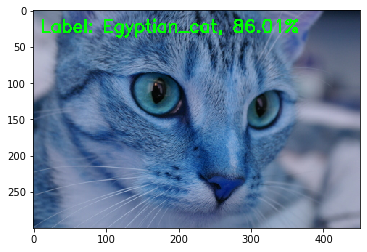

In [9]:
# Load an color image in grayscale
img = cv2.imread(imagepath,1)
(imagenetID, label, prob) = P[0][0]
cv2.putText(img, "Label: {}, {:.2f}%".format(label, prob * 100),(10, 30), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
plt.imshow(img)